# LAB 06 - 데이터 시각화 개요

## 01 LinePlot

📘연습문제

 1. Covid19 확진자수 변동 추이 시각화
covid19_active 데이터는 2022년 5월 1일부터 2023년 5월 31일까지 서울과 전국의 Covid19 일일 확진자 수를 기록한 데이터이다. 

조사 기간동안 서울과 전국의 확진자 수가 어떻게 변화하고 있는지에 대한 추이를 시각화 하고 시각화 결과에서 얻을 수 있는 객관적 사실을 하나 이상 서술하시오.

단, x축에 표시되는 날짜는 30일 간격으로 표시한다.

2. 비트코인 시세 변동 추이 시각화
bitcoin 데이터는 2021년 06월 01일부터 2023년 06월 30일까지의 비트코인 시세 데이터의 일부이다.

이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을

20일 간격으로 설정하여 시각화 하고 시각화 결과에서 얻을 수 있는 객관적 사실을 하나 이상 서술하시오

### #사전준비

In [1]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
from pandas import merge


covid19_active = load_data('covid19_active')
covid19_active

[data] https://data.hossam.kr/data/lab06/covid19_active.xlsx
[desc] 2022년 5월 1일부터 2023년 5월 31일까지 서울과 전국의 Covid19 일일 확진자 수를 기록한 데이터 (출처: 서울시)
[!] Cannot read metadata


,서울시 일일 확진,전국 일일 확진
기준일,,
2023-05-31,5987.0,24411.0
2023-05-30,3326.0,13529.0
2023-05-29,1393.0,6868.0
2023-05-28,1393.0,6868.0
2023-05-27,4078.0,17796.0
...,...,...
2022-05-05,6645.0,42296.0
2022-05-04,7436.0,49064.0
2022-05-03,8709.0,51131.0


In [2]:
# 데이터 전처리
covid19_active_copy=covid19_active.copy()

covid19_active_noindex=covid19_active_copy.reset_index()
covid19_active_noindex.sort_values('기준일')

#인덱스 새로 지정해주기
covid19_active_preprocessed = covid19_active_noindex.reset_index(drop=True)
covid19_active_preprocessed


,기준일,서울시 일일 확진,전국 일일 확진
0,2023-05-31,5987.0,24411.0
1,2023-05-30,3326.0,13529.0
2,2023-05-29,1393.0,6868.0
3,2023-05-28,1393.0,6868.0
4,2023-05-27,4078.0,17796.0
...,...,...,...
391,2022-05-05,6645.0,42296.0
392,2022-05-04,7436.0,49064.0
393,2022-05-03,8709.0,51131.0
394,2022-05-02,2653.0,20084.0


###  1. Covid19 확진자수 변동 추이 시각화

#### 그래프 설정


In [3]:
#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 그래프 준비

- 특정 요일을 기준으로 반복된 것 같아 확인해보니
> 실제로 당시 매주 수요일은 확진자가 급증하는 경향이 있었음
> https://www.hani.co.kr/arti/society/health/1026039.html

>주말에는 검사가 줄어 확진자가 감소하다가 수요일에는 확진자가 확 늘어나는 경향이 있었던 것으로 확인
https://news.sbs.co.kr/news/endPage.do?news_id=N1006578704

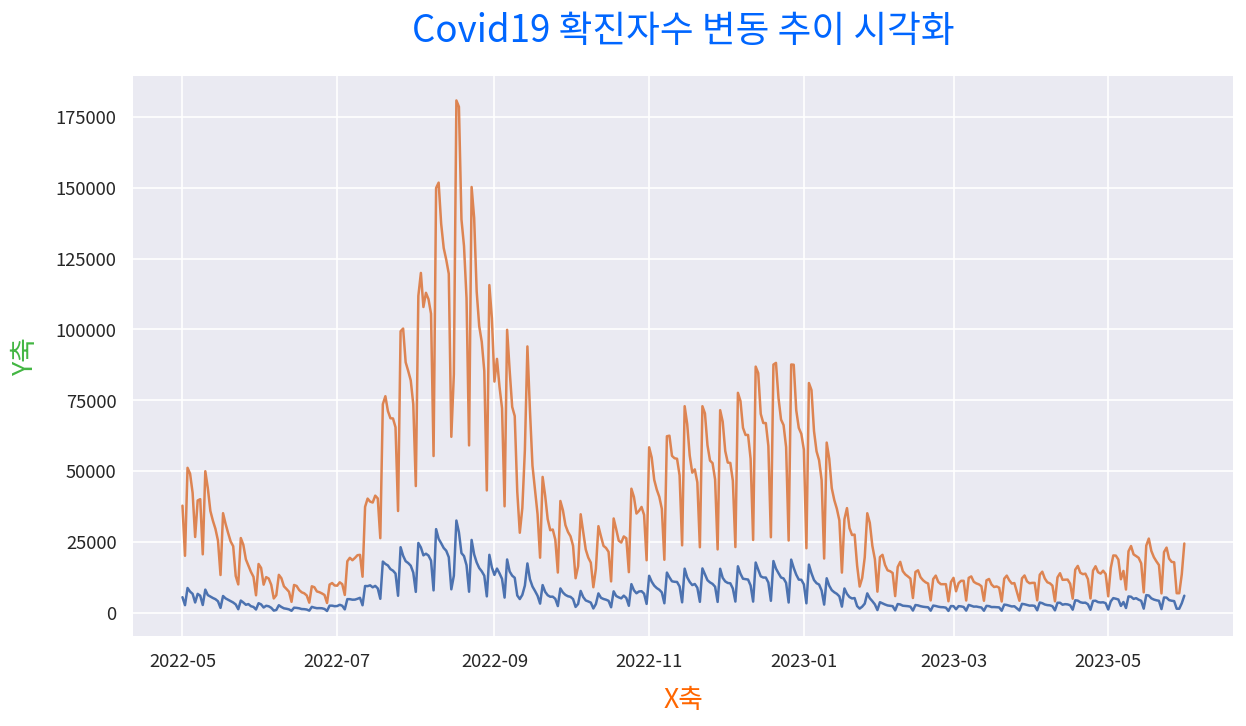

In [4]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (기본 구성에서 추가된 항목)
sb.lineplot(data = covid19_active_preprocessed,x='기준일',y ='서울시 일일 확진') 
sb.lineplot(data = covid19_active_preprocessed,x='기준일',y ='전국 일일 확진') 

#인덱스가 x 축, 리스트 값이 y 축

#3) 그래프 꾸미기 : 생략

ax.set_title('Covid19 확진자수 변동 추이 시각화',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)


# ax.set_xticks(range('2022-05-01'.'2023-05-31',30))

#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

<강사님 풀이>
- 30일

In [5]:
# 30일 단위의 인덱스를 뽑아서 리스트로 확인한다

#전체 날짜 목록 가져오기
x_index = covid19_active.index.sort_values()
x = list(range(0, len(x_index), 30))
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]

In [6]:
# #### x좌표에 해당하는 날짜만 추출

xticks = []

for i in x:
    xticks.append(x_index[i].strftime('%y/%m/%d'))

print(xticks)

['22/05/01', '22/05/31', '22/06/30', '22/07/30', '22/08/29', '22/09/28', '22/10/28', '22/11/27', '22/12/27', '23/01/26', '23/02/25', '23/03/27', '23/04/26', '23/05/26']


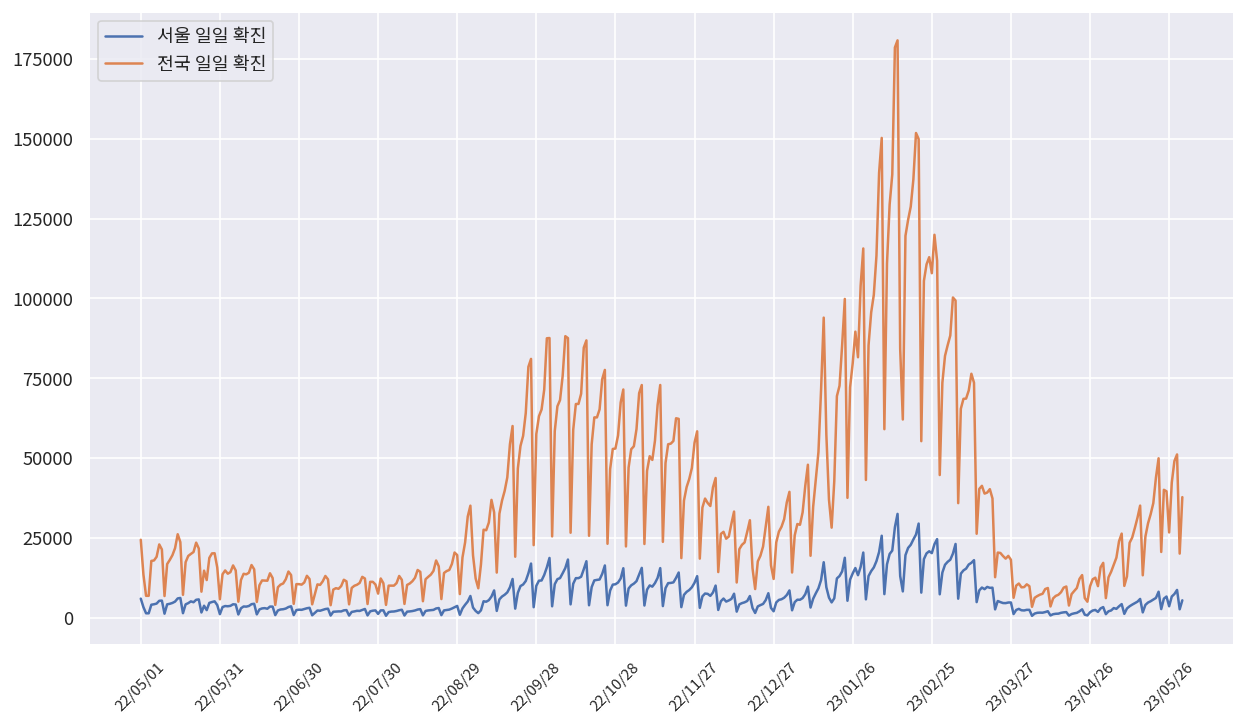

In [7]:
# # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280
height_px = 760
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# # 2) 그래프 그리기
# sb는 seaborn (import seaborn as sb)
sb.lineplot(data=covid19_active['서울시 일일 확진'].values, label="서울 일일 확진")
sb.lineplot(data=covid19_active['전국 일일 확진'].values, label="전국 일일 확진")

# # 3) 그래프 꾸미기
ax.grid(True)                # 격자 표시

# x축 눈금 및 라벨 설정
ax.set_xticks(x)
ax.set_xticklabels(xticks, rotation=45, fontsize=9)   #라벨의 각도 조절

ax.legend(loc="upper left")

# # 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("myplot.png", dpi=my_dpi)  # 생략 가능
plt.show()                             # 그래프 화면 출력

plt.close()                             # 그래프 작업 종료

### 비트코인 시세 변동 추이 시각화

In [8]:
bitcoin = load_data('bitcoin')
bitcoin

[data] https://data.hossam.kr/data/lab06_/bitcoin.xlsx
[desc] 2021년 06월 01일부터 2023년 06월 30일까지의 비트코인 시세 데이터 (출처: bitcoin.com)
[!] Cannot read metadata


,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...
2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199


In [9]:
# 데이터 전처리?
bitcoin_copy=bitcoin.copy()

bitcoin_noindex=bitcoin_copy.reset_index()
bitcoin_noindex.sort_values('날짜')

#인덱스 새로 지정해주기
bitcoin_preprocessed = bitcoin_noindex.reset_index(drop=True)
bitcoin_preprocessed


,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


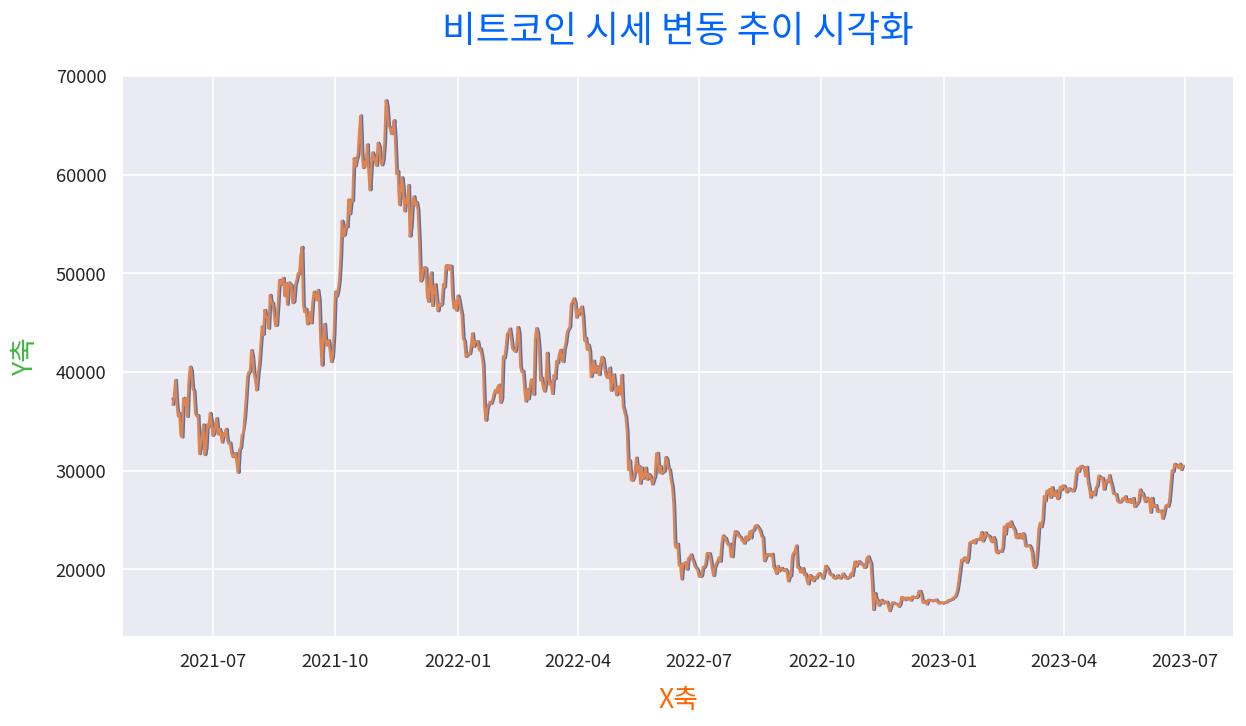

In [10]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (기본 구성에서 추가된 항목)
sb.lineplot(data = bitcoin_preprocessed,x='날짜',y ='시가') 
sb.lineplot(data = bitcoin_preprocessed,x='날짜',y ='종가') 

#인덱스가 x 축, 리스트 값이 y 축

#3) 그래프 꾸미기 : 생략

ax.set_title('비트코인 시세 변동 추이 시각화',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)


# ax.set_xticks(range('2022-05-01'.'2023-05-31',30))

#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

In [11]:
merged = merge(covid19_active_preprocessed,bitcoin_preprocessed,left_on ='기준일',right_on='날짜')

filtered = merged.filter(['날짜','서울시 일일 확진','종가','시가'])

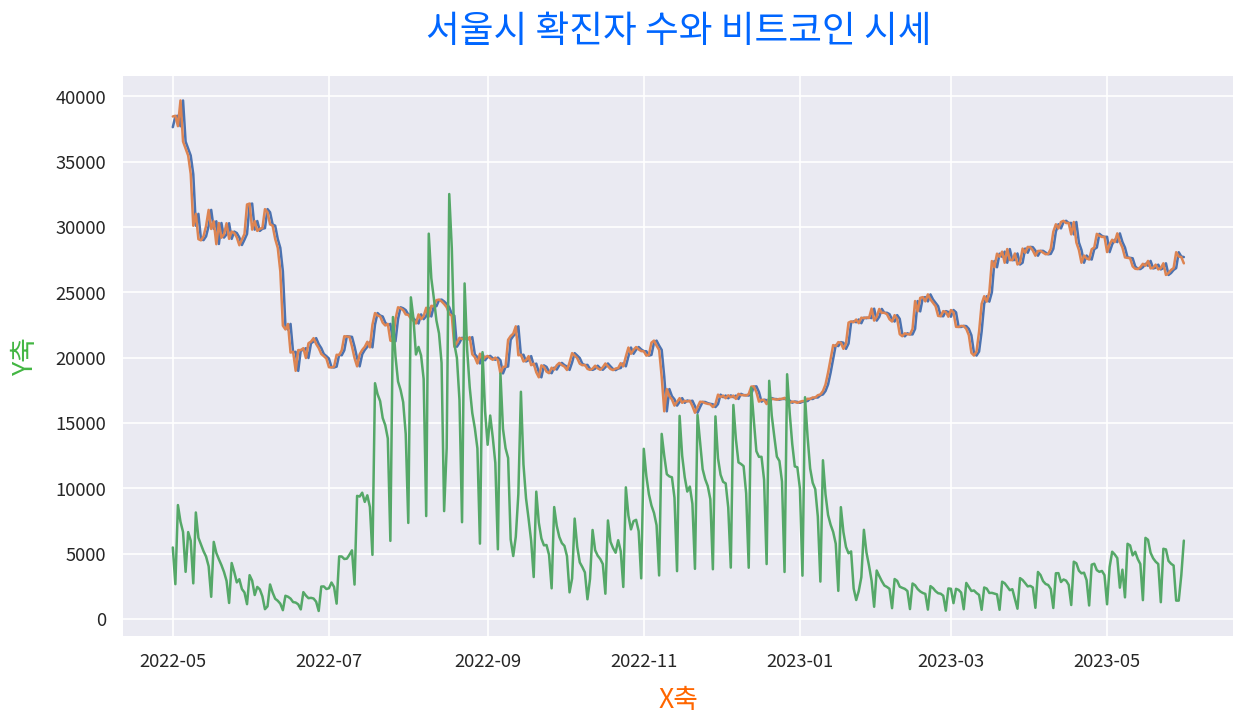

In [12]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (기본 구성에서 추가된 항목)
sb.lineplot(data = filtered,x='날짜',y ='시가') 
sb.lineplot(data = filtered,x='날짜',y ='종가') 
sb.lineplot(data = filtered,x='날짜',y ='서울시 일일 확진') 

#인덱스가 x 축, 리스트 값이 y 축

#3) 그래프 꾸미기 : 생략

ax.set_title('서울시 확진자 수와 비트코인 시세',color='#0066ff',fontsize=22,fontweight=1000,pad=20)

ax.set_xlabel('X축',color='#ff6600',fontsize=16,labelpad=10)
ax.set_ylabel('Y축',color="#42b642",fontsize=16,labelpad=10)


# ax.set_xticks(range('2022-05-01'.'2023-05-31',30))

#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

- 코로나 확진자 수가 급증하기 시작한  2022년 6월 경과 2022년 11월 경 비트코인 종가가 하락하는 양상을 보였고, 2022년 3월 부터 확진자 수가 낮은 수준을 유지하자 비트코인 종가가 점증적으로 상승했음.
- 불안전자산인 비트코인이 코로나라는 미지의 위험 요소에 영향을 많이 받게 된 것이 확인 되었음.

<강사님 풀이>

#### 1.시가 데이터 추출

In [13]:
start = list(bitcoin['시가'].values)

print(len(start))
print(start[:5])

760
[np.float64(37294.3), np.float64(36687.7), np.float64(37555.7), np.float64(39191.4), np.float64(36841.2)]


#### 2. 종가 데이터 확인

In [14]:
end = list(bitcoin['종가'].values)

print(len(end))
print(end[:5])

760
[np.float64(36687.6), np.float64(37555.8), np.float64(39187.3), np.float64(36851.3), np.float64(35520.0)]


#### 3. 20일 간격 인덱스 생성

In [15]:
x = list(range(0, len(start), 20))
print(len(x))
print(x)

38
[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740]


#### 4. 20일 간격 label 추출

In [16]:
xticks = []

for i in x:
    xticks.append(bitcoin.index[i].strftime("%y/%m/%d"))

xticks[:5]

['21/06/01', '21/06/21', '21/07/11', '21/07/31', '21/08/20']

#### 시각화 (그림 그리기)

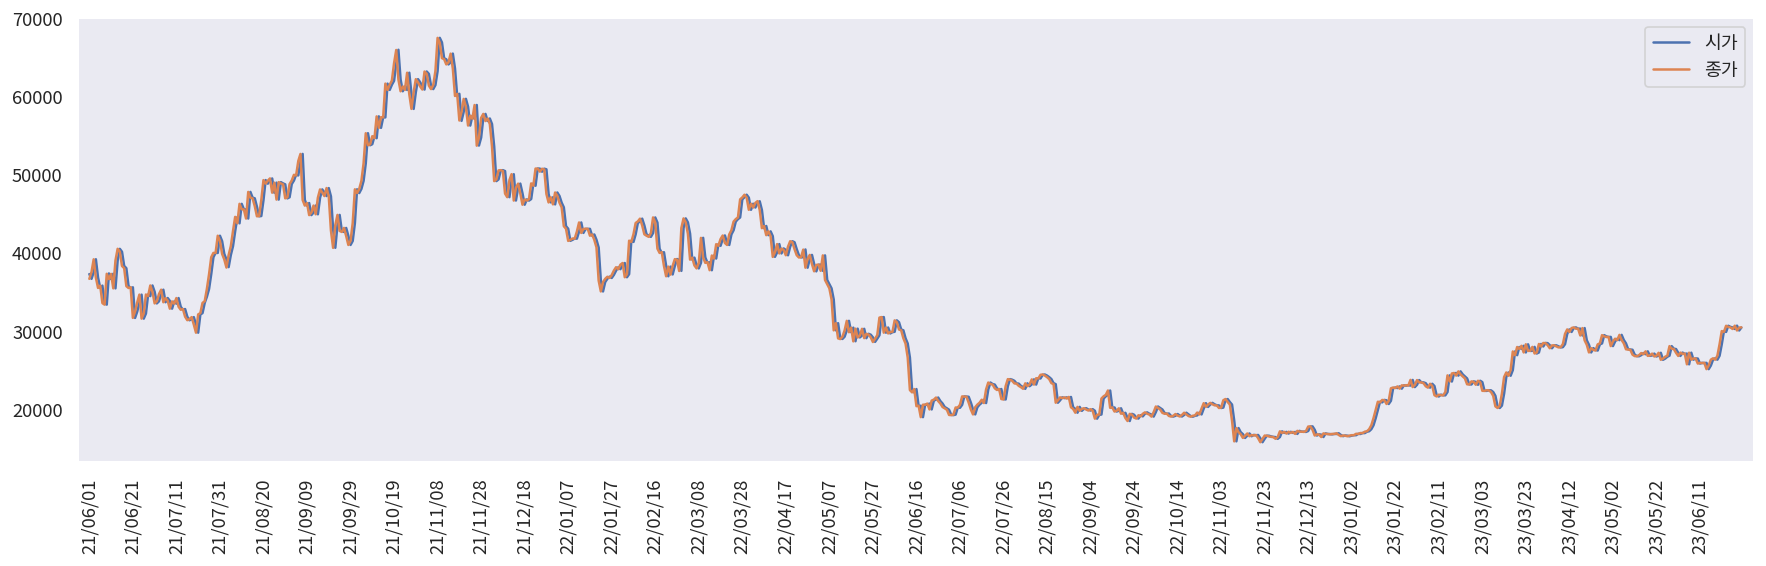

In [17]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1800
height_px = 600
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
sb.lineplot(data=start, label="시가")
sb.lineplot(data=end, label="종가")

# 3) 그래프 꾸미기
ax.grid(True)                       # 격자 표시
ax.legend()
ax.set_xticks(x, xticks, rotation=90)
ax.set_xlim([-5, len(start)+5])


#4) 출력
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

#### 전체 기간 개요
- 데이터는 2021년 중반부터 2023년 중반까지 약 2년의 시계열로 구성되어 있다.
- 전체 기간 동안 가격은 여러 차례 큰 상승과 큰 하락이 반복되며, 단순한 단일 추세가 아닌 다중 파동 형태를 보인다.
- 시가와 종가는 기간 전체에서 거의 동일한 방향성을 가지며 동조적으로 움직인다.

#### 주요 시점별 흐름
- **2021년 중반~후반:** 그래프 초반부에서 비교적 높은 가격대가 유지되며, 그래프 상단 영역에 위치한다.
- **2021년 말~2022년 초:** 가격이 점진적으로 하락하며 전체적인 흐름이 아래쪽으로 이동한다.
- **2022년 중반:** 그래프에서 가장 낮은 구간 중 하나가 이 시점에 나타난다. 시가와 종가 모두 그래프의 하단부 근처에서 움직인다.
- **2022년 말~2023년 초:** 다시 완만한 반등 구간이 나타나며 그래프가 중간 높이까지 되돌아온다.
- **2023년 봄~초여름:** 가격이 다시 점진적으로 상승하여 중간~상단 영역에 위치하며 그래프 말미에서 회복 흐름이 보인다.

#### 가격 수준에 대한 대략적 사실
- 그래프 상단부(가장 높은 영역)는 전체 기간에서 일부 시점에만 나타나며, 이 구간은 **최고점에 가까운 가격대**로 보인다.
- 그래프 중간 영역은 전체 기간 중 가장 넓게 분포하며, **평균적인 가격 수준**이 이 근처에 위치한다.
- 그래프 하단부(가장 낮은 영역)는 몇 개의 특정 시점에서 짧게 나타나며, 이는 **연중 최저 수준의 가격대**에 해당한다.
- 시가와 종가 간의 차이는 하루 단위에서는 크게 벌어지지 않는 경우가 많지만, 특정 시기에는 하루 변동 폭이 확연히 넓어진다.

#### 상승 구간의 시점 및 특징
- **2021년 하반기 초입:** 20일 간격 점들이 그래프 상단으로 향하며 명확한 상승 흐름을 보인다.
- **2022년 말~2023년 1분기:** 저점에서부터 점들이 단계적으로 위쪽으로 배치되며 회복세를 형성한다.
- 상승 구간에서는 20일 단위 점의 위치 변화 폭이 커지며 기울기가 비교적 가파르게 나타난다.

#### 하락 구간의 시점 및 특징
- **2021년 말~2022년 중반:** 그래프에서 가장 분명한 하락 흐름이 나타나는 시기이며, 점들의 위치가 지속적으로 아래쪽으로 이동한다.
- 하락 구간에서는 시가와 종가 모두 이전 기간 대비 낮은 위치를 반복적으로 기록하며 장기간 하향 패턴이 지속된다.
- 일부 구간에서는 20일 간격 점 사이의 거리도 커져 급격한 가격 이동이 있었음을 보여준다.

#### 횡보(안정) 구간의 시점 및 특징
- **2022년 초~중반 일부 구간:** 시가와 종가 모두 일정한 높이에서 좁은 폭으로 움직이며 비교적 안정적인 패턴을 보인다.
- **2023년 초반 일부 기간:** 반등 이후 가격이 일정 범위 내에서 반복적으로 오르내리는 모습을 보인다.
- 횡보 구간에서는 20일 간격 점들의 높이가 비슷하게 유지된다.

#### 시가·종가 관계의 시점적 특징
- 거의 모든 시점에서 시가와 종가는 서로 가깝게 위치하여 하루 변동 폭이 지나치게 크지 않음을 보여준다.
- 특정 변동성 큰 기간(예: 하락 바닥 직전, 급등 직전)에는 시가와 종가의 일중 간격이 더 넓어지는 패턴이 나타난다.
- 두 선의 위치가 지속적으로 교차하거나 가까운 경우가 많아, 시가와 종가의 일별 패턴이 상당히 비슷한 구조를 가진다.

#### 변동성 측면에서의 시점별 특징
- **급격한 변동 시기:** 그래프 기울기가 급격하게 변하는 구간(2021년 말~2022년 중반, 일부 반등 구간)에서 변동 폭이 크다.
- **안정된 시기:** 그래프가 완만한 곡선을 그리며 점 차이가 작아지는 구간(2022년 중반 일부, 2023년 초 일부)에서 단기 변동성은 줄어든다.
- 전체적으로는 상승·하락·횡보가 모두 반복되며, 변동성 수준이 일정하지 않고 시기별로 크게 달라진다.

#### 전체 흐름 종합
- 최고점, 중간값, 최저점이 여러 번 반복되면서 다중 파동 구조가 뚜렷하게 나타난다.
- 시간 흐름에 따라 그래프 상단 → 하단 → 중간 → 상단으로 이동하는 모습이 나타나며, 전체 기간이 명확하게 여러 국면으로 구분된다.
- 시가와 종가 모두 동일한 흐름을 보이므로 단일 자산의 가격 움직임이 일관되게 반영된 그래프임을 확인할 수 있다.
